In [1]:
# modules
import numpy as np
import matplotlib.pyplot as PLT
from music21 import *

#%matplotlib inline
%load_ext music21.ipython21

In [23]:
# functions

def rotate(l, y=1):
   if len(l) == 0:
      return l
   y = -y % len(l)
   return l[y:] + l[:y]

def constructTetrachordMatrix(tl, th):

    _chess_tetrachord = []

    for i in range(8):
        if i <= 3:
            tetrachord_low = [tl[0], tl[1], tl[2], tl[3]]
            tetrachord_high = [th[0], th[1], th[2], th[3]]
            b = rotate(tetrachord_low, -i) + rotate(tetrachord_high, i)
            _chess_tetrachord.append(b)
        else:
            tetrachord_low = [tl[2], tl[1], tl[0], tl[3]]
            tetrachord_high = [th[0], th[3], th[2], th[1]]
            b = rotate(tetrachord_high, i) + rotate(tetrachord_low, -i)
            _chess_tetrachord.append(b)


    return np.array(_chess_tetrachord)

def build_checkerboard(w, h):
    re = np.r_[w * [10, 20]]  # even-numbered rows
    ro = np.r_[w * [20, 10]]  # odd-numbered rows
    return np.row_stack(h * (re, ro))

def constructChess():

    ch_col = ['A','B','C','D','E','F','G','H']
    chess = []
    for i,e in enumerate(ch_col):
        x = [e + str(a) for a in range(1,9)]
        chess.append(x)

    return np.array(chess)

def returnMove(move, chess):
    #s = "e2-e4".upper()
    m = move.upper().split('-')
    start = m[0]
    stop = m[1]
    startindex = np.where(chess==start)
    stoptindex = np.where(chess == stop)

    return [startindex, stoptindex]

def show_checkerboard(board, text=None):
    fig, ax = PLT.subplots()
    ax.imshow(board, cmap=PLT.get_cmap('gray'), vmin=-10, vmax=20, interpolation='nearest')
    if text is not None:
        for row, row_i in enumerate(text):
            for col, col_i in enumerate(row_i):
                ax.text(col, row, col_i, va='center', ha='center')
    PLT.show()
    
def printNotes(notes):
    for i in notes:
        index = returnMove(i, chess)
        print(chess_tetrachord[index[0]], chess_tetrachord[index[1]])

def showNotes(notes):

    s = stream.Score(id='mainScore')
    stream.Score()
    part = stream.Part(id='part')
    part.timeSignature = meter.TimeSignature('8/1')
    tones = []

    for tone in notes:
        #print(tone)
        pitch1 = pitch.Pitch(tone)
        nota = note.Note(pitch1.nameWithOctave)
        nota.duration.quarterLength = 4
        tones.append(nota)

    part.append(tones)
    s.insert(0, part)
    #%load_ext music21.ipython21.ipExtension
    #%reload_ext music21.ipython21
    #s.show()
    #from IPython.core.display import Image
    #Image(filename=s.write('lily.svg'))
    #s.show()
    return s

def movesToNotes(moves, chess, chess_tetrachord):
    notes = []
    for i in moves:
        index = returnMove(i, chess)
        notes.append(chess_tetrachord[index[0]][0])
        notes.append(chess_tetrachord[index[1]][0])
        #print(chess_tetrachord[index[0]], chess_tetrachord[index[1]])#
    print(notes)
    return showNotes(notes)

def movesToRhytm(moves, chess, chess_tetrachord):
    notes = []
    for i in moves:
        index = returnMove(i, chess)
        # eliminate zeros
        if chess_tetrachord[index[0]][0] != 0:
            notes.append(chess_tetrachord[index[0]][0])
        if chess_tetrachord[index[1]][0] != 0:
            notes.append(chess_tetrachord[index[1]][0])
        #print(chess_tetrachord[index[0]], chess_tetrachord[index[1]])#
    return notes

In [3]:
##################
# HIER GEHT'S LOS!


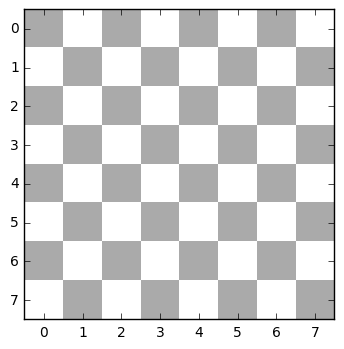

TOP VIEW
WHITE IS ON THE LEFT, BLACK IS ON THE RIGHT. f.e. 0-0 = WHITE ROOK, 7-7 = BLACK ROOK


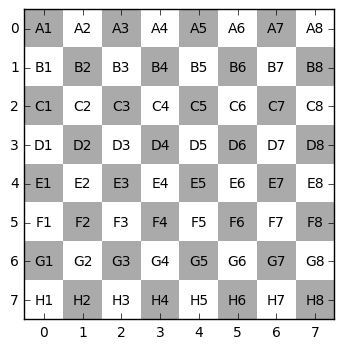

In [4]:
tetrachord_low = ["L1","L2","L3","L4"]
tetrachord_high = ["H1","H2","H3","H4"]

chess_tetrachord = constructTetrachordMatrix(tetrachord_low, tetrachord_high)
board = build_checkerboard(4,4)
show_checkerboard(board)
print("TOP VIEW")
print("WHITE IS ON THE LEFT, BLACK IS ON THE RIGHT. f.e. 0-0 = WHITE ROOK, 7-7 = BLACK ROOK")
chess = constructChess()
board = build_checkerboard(4,4)
show_checkerboard(board,chess)

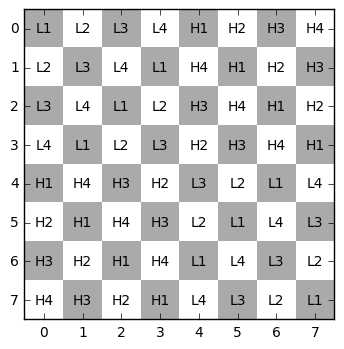

L[x] = LOW TETRACHORD, H[x] = HIGH TETRACHORD


In [5]:
tetrachord_low = ["L1","L2","L3","L4"]
tetrachord_high = ["H1","H2","H3","H4"]

chess_tetrachord = constructTetrachordMatrix(tetrachord_low, tetrachord_high)
board = build_checkerboard(4,4)
show_checkerboard(board,chess_tetrachord)
print("L[x] = LOW TETRACHORD, H[x] = HIGH TETRACHORD")

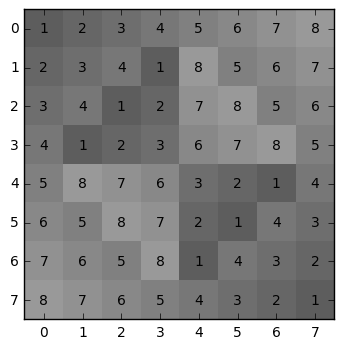

DIAGONAL WEIGHT MIRRORING


In [6]:
tetrachord_low = [1,2,3,4]
tetrachord_high = [5,6,7,8]
chess_tetrachord = constructTetrachordMatrix(tetrachord_low, tetrachord_high)
board = build_checkerboard(4,4)
show_checkerboard(chess_tetrachord,chess_tetrachord)
print("DIAGONAL WEIGHT MIRRORING")

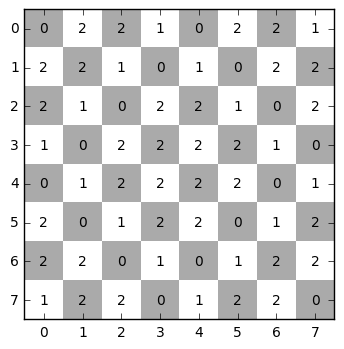

tetrachord 0+2+2+1


In [7]:
tetrachord_low = [0,2,2,1]
tetrachord_high = [0,2,2,1]

chess_tetrachord = constructTetrachordMatrix(tetrachord_low, tetrachord_high)
board = build_checkerboard(4,4)
show_checkerboard(board,chess_tetrachord)

print("tetrachord 0+2+2+1")

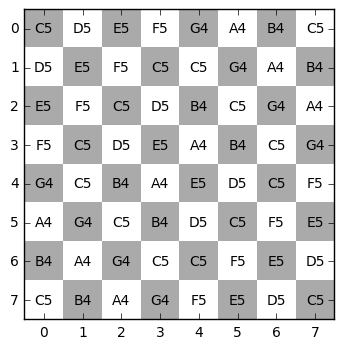

C MAJOR


In [8]:
tetrachord_low = ["C5","D5","E5","F5"]
tetrachord_high = ["G4","A4","B4","C5"]

chess_tetrachord = constructTetrachordMatrix(tetrachord_low, tetrachord_high)
board = build_checkerboard(4,4)
show_checkerboard(board,chess_tetrachord)

print("C MAJOR")

DIE SIZILIANISCHE VERTEIDIGUNG
['C5', 'A4', 'G4', 'B4']


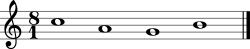

In [9]:
print("DIE SIZILIANISCHE VERTEIDIGUNG")
moves = ["e2-e4", "c7-c5"]
s = movesToNotes(moves, chess, chess_tetrachord)
s.show()


In [24]:
tetrachord_low = [0,2,2,1]
tetrachord_high = [0,2,2,1]

chess_tetrachord = constructTetrachordMatrix(tetrachord_low, tetrachord_high)
s = movesToRhytm(moves, chess, chess_tetrachord)
print("RHYTM SEQUENCE:",s)

RHYTM SEQUENCE: [1, 2, 2]
